In [40]:
import pandas as pd
import numpy as np
from src.Particle import ParticleType
from src.JetBuilder import JetBuilder
from src.JetImage import JetImage, JetImageCalculator, JetImageAvarageCalculator

In [27]:
data_gluon = pd.read_csv('../Data/g_jets.csv', header=None, sep=' ')
data_quark = pd.read_csv('../Data/q_jets.csv', header=None, sep=' ')
data_top = pd.read_csv('../Data/t_jets.csv', header=None, sep=' ')

In [28]:
# creating the list with the jets objects
jet_builder = JetBuilder()
# For the data exploration this amount of jets is enough
# More than that the evaluation stars to become really slower
gluon_jets = jet_builder.create_jets(data_frame=data_gluon[:5000], jet_type=ParticleType.Gluon)
quark_jets = jet_builder.create_jets(data_frame=data_quark[:5000], jet_type=ParticleType.LightQuark)
top_jets = jet_builder.create_jets(data_frame=data_top[:5000], jet_type=ParticleType.Top)

****Single jet images****

In [29]:
jet_image = JetImage((-0.4, 0.4), (-0.4, 0.4), 16, 16, JetImageCalculator())

In [30]:
first_gluon_image = jet_image.create_jet_image(quark_jets[10])

In [31]:
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

Text(0, 0.5, '$\\eta^{rel}$')

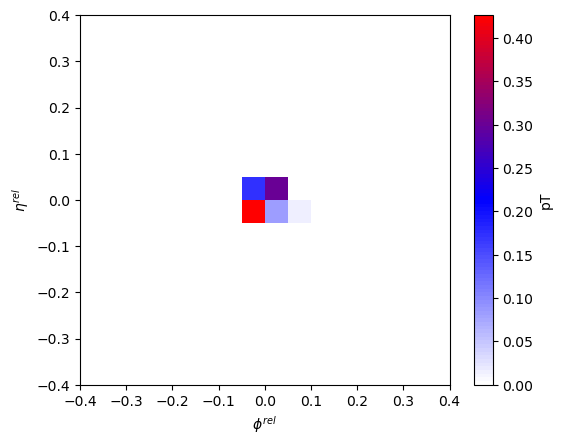

In [32]:
import matplotlib.pyplot as plt
# import numpy as np
plt.imshow(first_gluon_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4))
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Avarage Jet Image****

In [33]:
single_jet_image = JetImageCalculator()
avg_jet_image = JetImageAvarageCalculator(jet_image_calculator=single_jet_image)
jet_image_avg = JetImage((-0.4, 0.4), (-0.4, 0.4), 20, 20, avg_jet_image)

****Top jets****

Text(0, 0.5, '$\\eta^{rel}$')

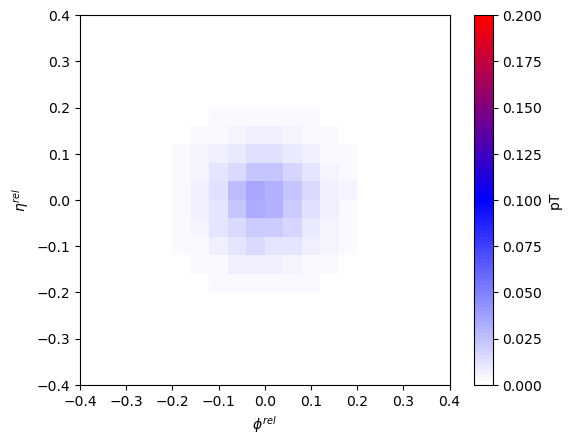

In [34]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(top_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Gluon Jets****

Text(0, 0.5, '$\\eta^{rel}$')

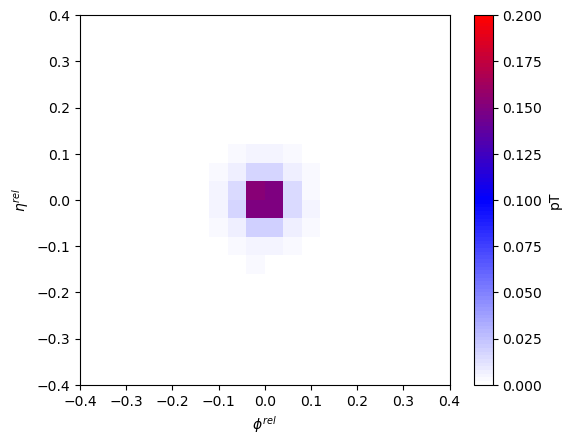

In [35]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(gluon_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Quark Jets****

Text(0, 0.5, '$\\eta^{rel}$')

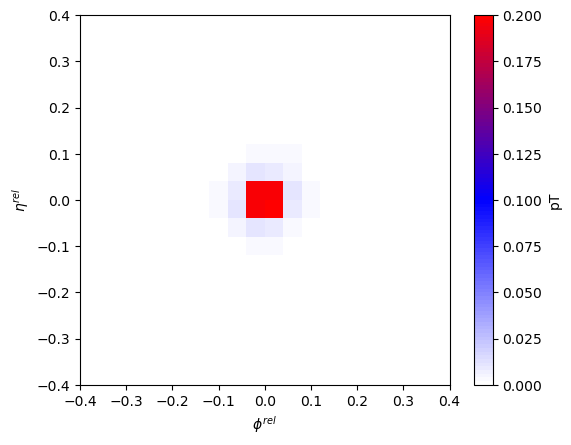

In [36]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(quark_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Energy Flow Polynomials****

In [37]:
import energyflow as ef

In [38]:
# all EFPs with d <= 5 
efpset = ef.EFPSet('d<=5', measure='hadr', beta=1, normed=True, verbose=True)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 54
  Composite: 48
  Total:  102


In [39]:
# information about each polynomial 
index = 10
graph = efpset.graphs(index)

n, _, d, v, _, c, p, _ = efpset.specs[index]

print("Graph:", graph)
print("Number of vertices, n:", n)
print("Number of edges,    d:", d)
print("Maximum valency,    v:", v)
print("VE complexity,      c:", c)
print("Number of primes,   p:", p)

Graph: [(0, 1), (0, 1), (0, 1), (0, 1), (0, 2)]
Number of vertices, n: 3
Number of edges,    d: 5
Maximum valency,    v: 5
VE complexity,      c: 2
Number of primes,   p: 1


In [41]:
# calculating the EFPs for each type of jets 
gluon_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in gluon_jets])
quarks_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in quark_jets])
top_efps = np.array([efpset.compute(jet.jet_substructure()) for jet in top_jets])

In [49]:
# evaluating the mean value
mean_efps_gluons = np.mean(gluon_efps, axis=0)
mean_efps_quarks = np.mean(quarks_efps, axis=0)
mean_efps_top = np.mean(top_efps, axis=0)

Avg EFP gluon: 0.011947516538499901
Avg EFP light quarks: 0.0072578366605104225
Avg EFP top: 0.03998023845808227


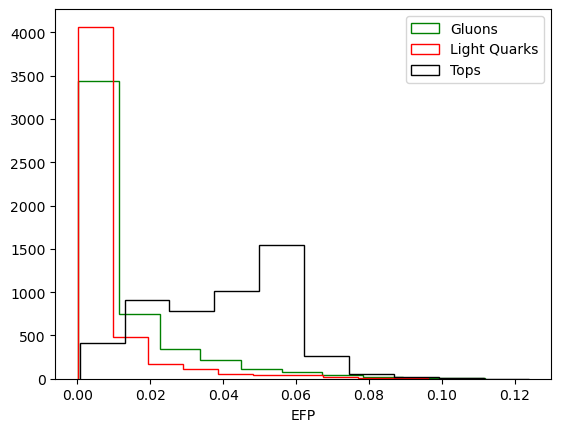

In [110]:
# ploting the distribution 
index = 2
print(f"Avg EFP gluon: {mean_efps_gluons[index]}")
print(f"Avg EFP light quarks: {mean_efps_quarks[index]}")
print(f"Avg EFP top: {mean_efps_top[index]}")
plt.hist(gluon_efps[:, index], color='green', label='Gluons', histtype='step')
plt.hist(quarks_efps[:, index], color='red', label='Light Quarks', histtype='step')
plt.hist(top_efps[:, index], color='black', label='Tops', histtype='step')
plt.xlabel('EFP')
plt.legend(loc='upper right')